In [1]:
import bagpy
from bagpy import bagreader

In [5]:
b = bagreader('/home/lih/BagPy/data/2016-06-01-14-57-13.bag')

[INFO]  Data folder /home/lih/BagPy/data/2016-06-01-14-57-13 already exists. Not creating.


In [6]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/catvehicle/accelerator,geometry_msgs/Wrench,1118,19.620823
1,/catvehicle/brake,geometry_msgs/Wrench,1117,19.541247
2,/catvehicle/cmd_vel,geometry_msgs/Twist,263,4.999906
3,/catvehicle/distanceEstimator/angle,std_msgs/Float32,4183,76.196345
4,/catvehicle/distanceEstimator/dist,std_msgs/Float32,4190,76.240666
5,/catvehicle/front_laser_points,sensor_msgs/LaserScan,4191,74.268331
6,/catvehicle/steering,geometry_msgs/Wrench,1117,19.549353
7,/catvehicle/vel,geometry_msgs/Twist,1120,19.571749
8,/catvehicle/velocity,rosjaus/ReportVelocityState,1120,19.584634
9,/catvehicle/waypoint,visualization_msgs/InteractiveMarkerPose,264,4.999844


In [7]:
velmsgs   = b.vel_data()

In [8]:
velmsgs

['/home/lih/BagPy/data/2016-06-01-14-57-13/catvehicle-cmd_vel.csv',
 '/home/lih/BagPy/data/2016-06-01-14-57-13/catvehicle-vel.csv']

In [9]:
import pandas as pd
veldf = pd.read_csv(velmsgs[0])

In [10]:
veldf

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.464818e+09,0.169401,0.0,0.0,0.0,0.0,NaN
1,1.464818e+09,-0.063698,0.0,0.0,0.0,0.0,NaN
2,1.464818e+09,0.217496,0.0,0.0,0.0,0.0,NaN
3,1.464818e+09,-0.112279,0.0,0.0,0.0,0.0,NaN
4,1.464818e+09,0.102366,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
258,1.464818e+09,0.001768,0.0,0.0,0.0,0.0,NaN
259,1.464818e+09,-0.040168,0.0,0.0,0.0,0.0,NaN
260,1.464818e+09,0.040184,0.0,0.0,0.0,0.0,NaN
261,1.464818e+09,0.001768,0.0,0.0,0.0,0.0,NaN


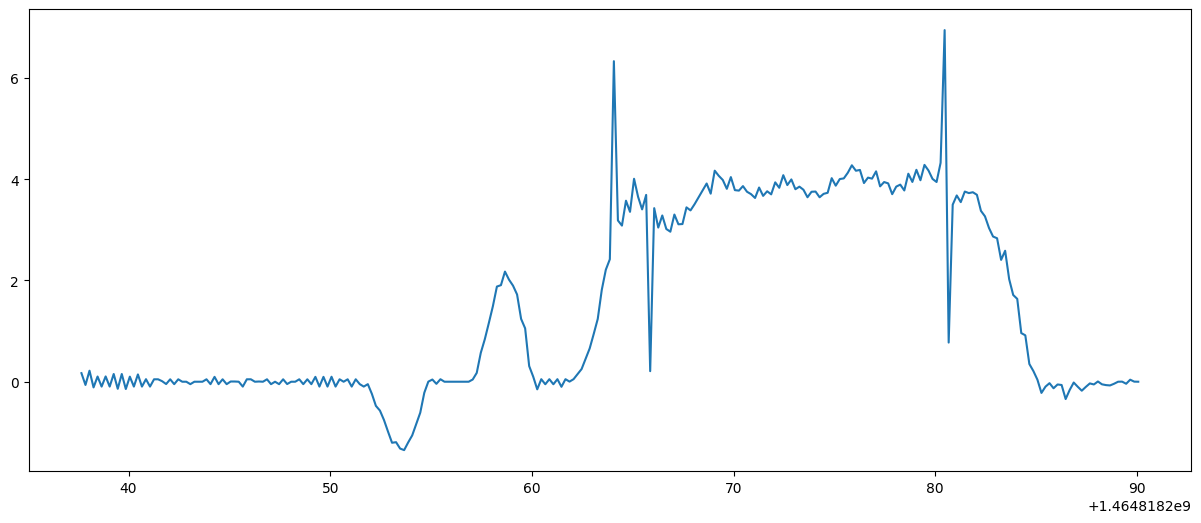

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(veldf['Time'], veldf['linear.x'])

In [13]:
newmsg = b.message_by_topic(topic='/catvehicle/front_laser_points')

In [14]:
len(newmsg)

74

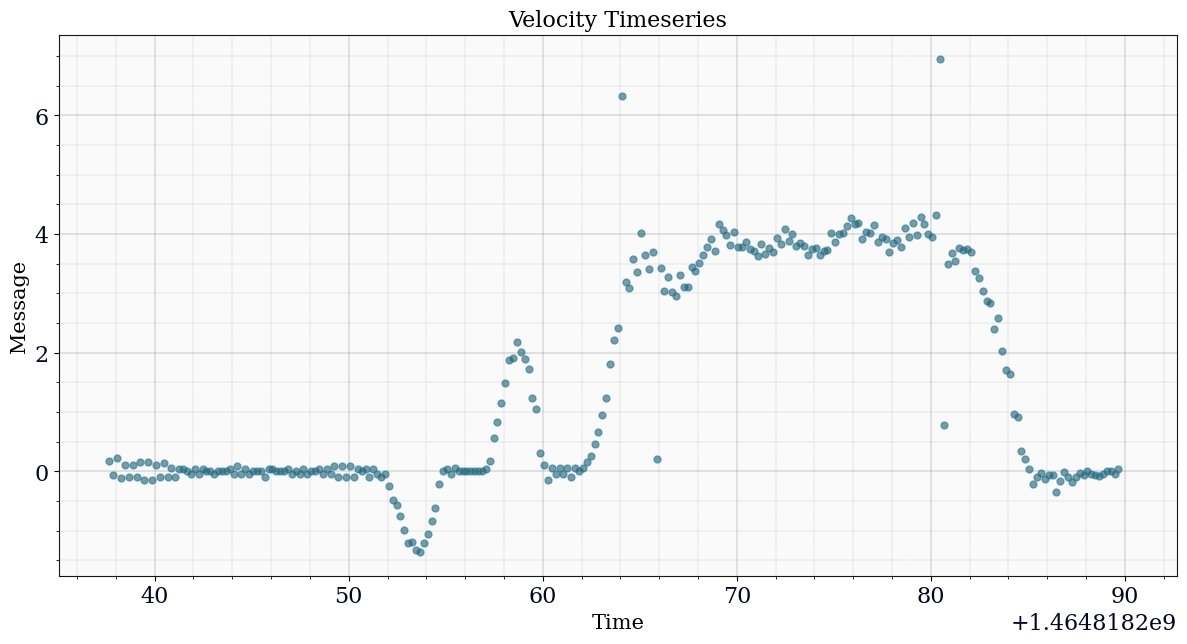

In [15]:
bagpy.animate_timeseries(veldf['Time'], veldf['linear.x'], title='Velocity Timeseries')